In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import plotly
import vincent
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read data 
inpatient_charge_data = pd.read_csv('../Data/inpatientCharges.csv')
us_regions = pd.read_csv('../Data/us_regions.csv')

# remove white space in 
inpatient_charge_data = inpatient_charge_data.rename(columns=lambda x: x.strip())

# merge data
inpatient_charge_merged_data = pd.merge(left= inpatient_charge_data, right=us_regions,left_on='Provider State' , right_on='State Code',how='left')

The datas set is description for the data is below: 

**DRG Definition** : Classification system that groups similar clinical conditions (diagnoses) and the procedures furnished by the hospital during the stay. 

**Total Discharges** : The number of discharges billed by all providers for inpatient hospital services. 

**Average Covered Charges** : The average charge of all provider's services covered by Medicare for discharges in the DRG. These will vary from hospital to hospital because of differences in hospital charge structures. 

**Average Total Payment**: The average total payments to all providers for the DRG including the MS-DRG amount, teaching,  disproportionate share, capital, and outlier payments for all cases. Also included in average total payments are co-payment and deductible amounts that the patient is responsible for and any additional payments by third parties for coordination of benefits. 

**Average Medicare Payment**: The average amount that Medicare pays to the provider for Medicare's share of the MS-DRG. Medicare payment amounts include the MS-DRG amount, teaching,  disproportionate share, capital, and outlier payments for all cases. Medicare payments DO NOT include beneficiary co-payments and deductible amounts nor any additional payments from third parties for coordination of benefits. 

In [3]:
# Constant Names 
drg_defination_name ='DRG Definition'
provider_name = 'Provider Name'
prodiver_id_name = 'Provider Id'
proder_address_name = 'Provider Street Address'
provider_city_name = 'Provider City'
provider_state_name = 'Provider State'
provider_zip_code_name = 'Provider Zip Code'
hospital_referal_name = 'Hospital Referral Region Description'
total_discharges_name = 'Total Discharges'
average_covered_charges_name = 'Average Covered Charges'
average_total_payment_name = 'Average Total Payments'
average_medicare_payment = 'Average Medicare Payments'
state_name = 'State'
state_code_name = 'State Code'
region_name = 'Region'
division_name = 'Division'

In [4]:
inpatient_charge_merged_data.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,State,State Code,Region,Division
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73,Alabama,AL,South,East South Central
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71,Alabama,AL,South,East South Central
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79,Alabama,AL,South,East South Central
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16,Alabama,AL,South,East South Central
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44,Alabama,AL,South,East South Central


In [5]:
unique_id =  len(inpatient_charge_data.groupby('Provider Id').count())
unique_providers = len(inpatient_charge_data.groupby('Provider Name').count())
unique_cities = len(inpatient_charge_data.groupby('Provider City').count())

print(f'There are {unique_id} unique provider id values in the data, and {unique_providers} unique providers in {unique_cities} unique cities' )

There are 3337 unique provider id values in the data, and 3201 unique providers in 1977 unique cities


There seens to be some formatting errors in the file. 

In [6]:
# remove $ sign from co
inpatient_charge_merged_data['Average Covered Charges'] = inpatient_charge_merged_data['Average Covered Charges'].str.strip("$")
inpatient_charge_merged_data['Average Total Payments'] = inpatient_charge_merged_data['Average Total Payments'].str.strip("$")
inpatient_charge_merged_data['Average Medicare Payments'] = inpatient_charge_merged_data['Average Medicare Payments'].str.strip("$")

# conver to numeric 
inpatient_charge_merged_data[['Average Covered Charges','Average Total Payments','Average Medicare Payments']] = inpatient_charge_merged_data[['Average Covered Charges','Average Total Payments','Average Medicare Payments']].apply(pd.to_numeric)

## Exploratory Data Analysis 

The initial exploratory data analysis reveals that there are some variables that are highly correlated such as Total payment and medicare payment. Average total payment has a long tail distribution, which could indicate potential fraud. The relationship between amount paid and covered has a positive relation, but has a high variance. It seems that there are few hospital that have a greater contribtion. 

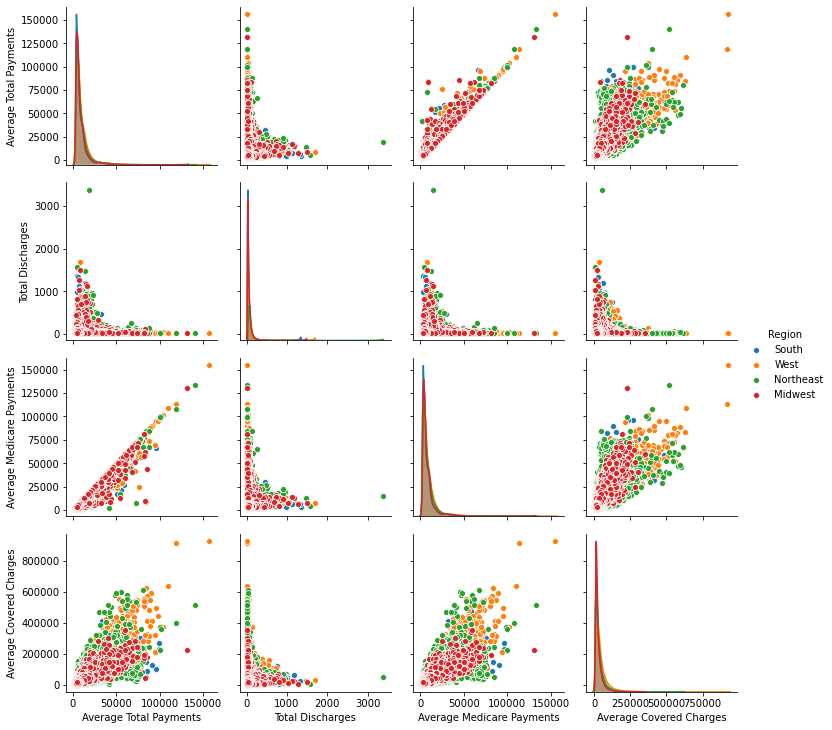

In [7]:
sns.pairplot(inpatient_charge_merged_data[['Region','Average Total Payments','Total Discharges','Average Medicare Payments','Average Covered Charges']], 
             hue= 'Region')

Lets explore the relationship between Average total payment, total discharges, Average medical payment, and Average covered charges 

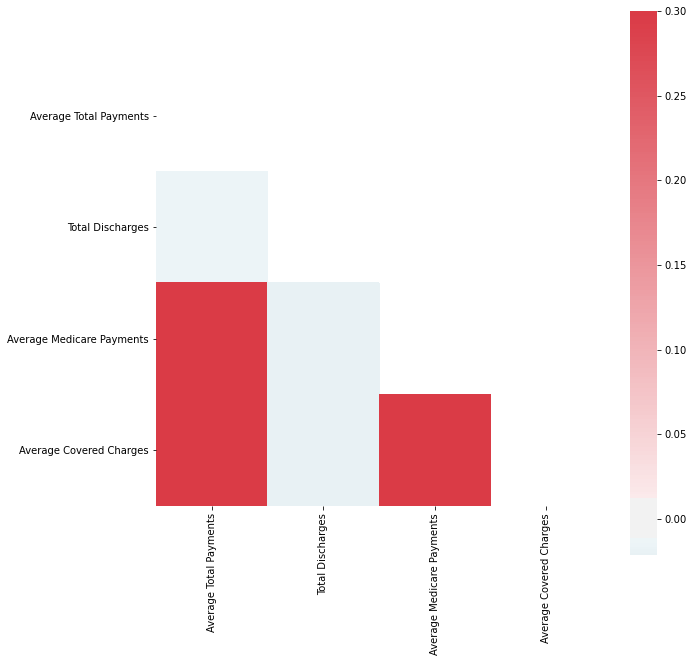

In [8]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Compute the correlation matrix
corr = inpatient_charge_merged_data[['Average Total Payments','Total Discharges','Average Medicare Payments','Average Covered Charges']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True)

Total payment is correlated with average charges and medicare payment. There's also a relationship between medicare payment and medicare coverage. However cost has very little to do with the number of patients seen. 

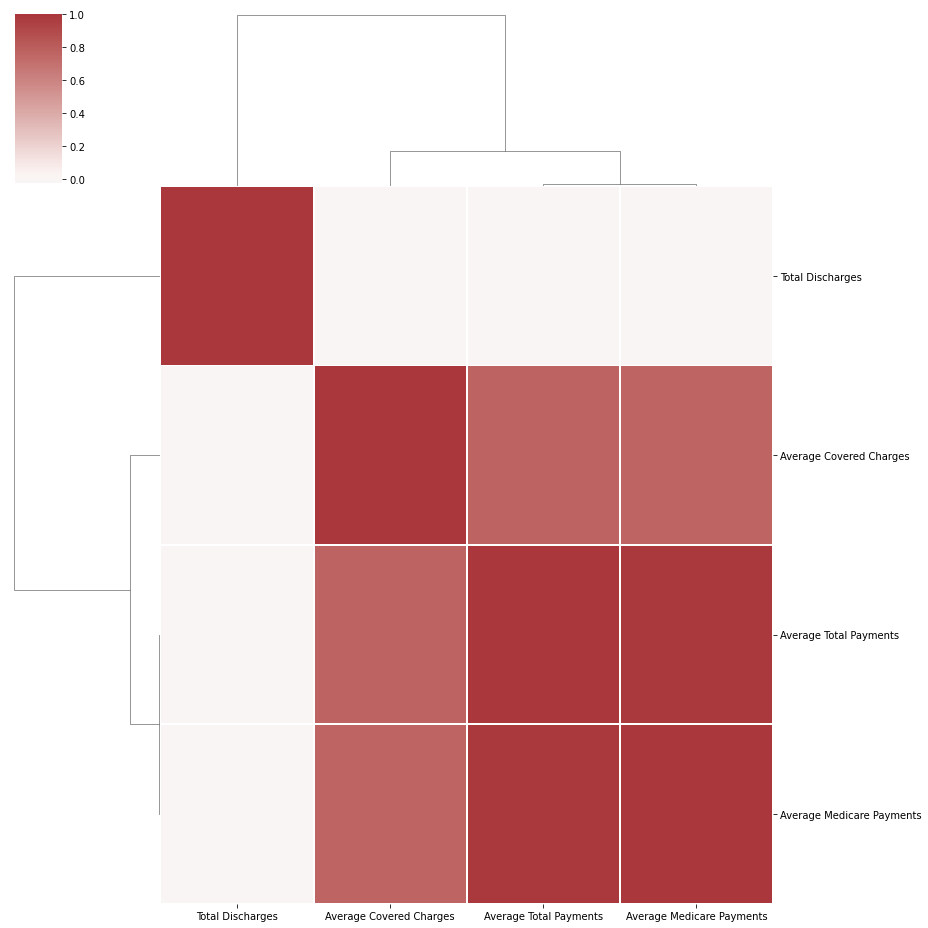

In [9]:
sns.clustermap(corr, center = 0 ,linewidths=.75,cmap="vlag", figsize=(13, 13) )

We can conclude that those variables are indeed related, for modeling purposes, it more make sense to include only of the three variables. 

Lets exp

In [10]:
# what are some of the common drg 
top_drg = inpatient_charge_merged_data.groupby(drg_defination_name).count()[provider_city_name].sort_values(ascending=False)
top_drg.head()

DRG Definition
194 - SIMPLE PNEUMONIA & PLEURISY W CC                                      3023
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                             2989
292 - HEART FAILURE & SHOCK W CC                                            2953
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                2950
641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC    2899
Name: Provider City, dtype: int64

<Figure size 1152x576 with 0 Axes>

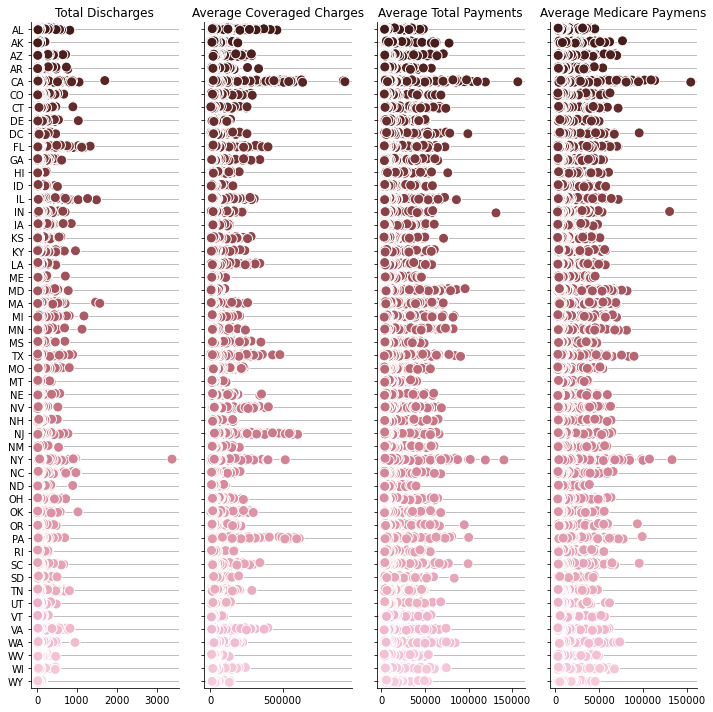

In [11]:
# Make the PairGrid
fig = plt.figure(figsize=(16,8))
g = sns.PairGrid(inpatient_charge_merged_data,
                 x_vars=['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments'], 
                 y_vars=["Provider State"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="ch:s=1,r=-.1,h=1_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlabel="", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total Discharges", "Average Coveraged Charges", "Average Total Payments",
          "Average Medicare Paymens"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

## Feature Engineering 

### 1. Regions

There are a 50 unique states in the data set, grouping the states by region might reveal a broader patterns not captured by the individual states. 

<Figure size 576x576 with 0 Axes>

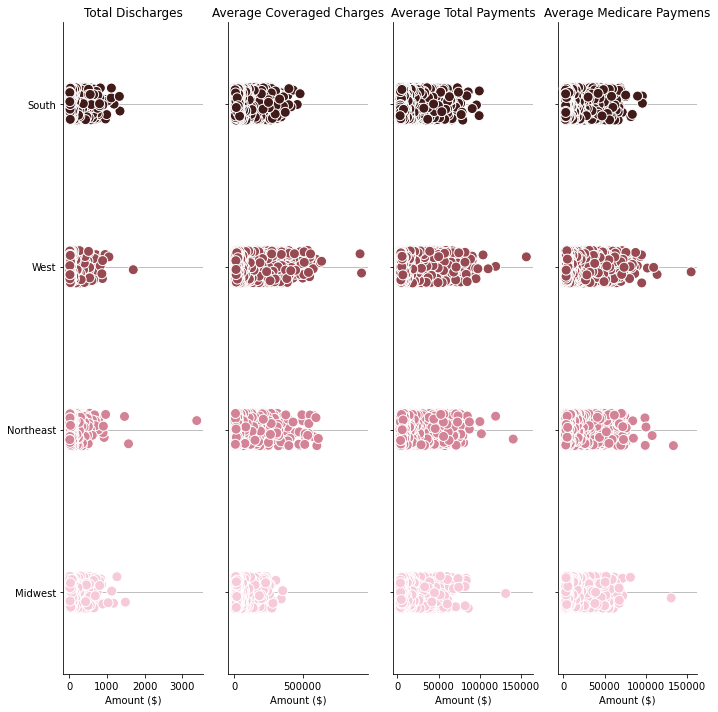

In [12]:
# Make the PairGrid
fig = plt.figure(figsize=(8,8))
g = sns.PairGrid(inpatient_charge_merged_data,
                 x_vars=[total_discharges_name, average_covered_charges_name, average_total_payment_name,average_medicare_payment], 
                 y_vars=[region_name],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="ch:s=1,r=-.1,h=1_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlabel="Amount ($)", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total Discharges", "Average Coveraged Charges", "Average Total Payments",
          "Average Medicare Paymens"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

### 2. Percentage of payment Covered 

Ratio reveals the perctange of total payout of the covered amount. 

In [13]:
inpatient_charge_merged_data['% of Payment Covered'] = inpatient_charge_merged_data[average_total_payment_name] / inpatient_charge_merged_data[average_covered_charges_name]


In [14]:
inpatient_charge_merged_data['% of Payment Covered'].head()

0    0.175264
1    0.382476
2    0.144699
3    0.387016
4    0.178873
Name: % of Payment Covered, dtype: float64

### 3. Patient Average by ID

Establising a baseline per patient allows us to compare against other patients. Baseline can also be used to alert when if amount is far from the mean. 

In [15]:
# gorup by id 
patient_avg_byid = inpatient_charge_merged_data.groupby('Provider Id').mean()[['Total Discharges',
                                                                        'Average Covered Charges','Average Total Payments','Average Medicare Payments']]
patient_avg_byid.head()

,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
Provider Id,,,,
10001,58.750000,35247.028152,8749.025109,7678.214348
10005,28.959184,16451.092041,6812.131224,5793.631429
10006,45.360465,36942.357442,8197.237907,7145.959535
10007,27.409091,12079.536818,4860.829091,4047.025455
10008,17.888889,16148.752222,5898.136667,4963.547778


### 4. Patient Average by State

States have differents norms and rules. This features allows us to capture the normal state of each. Result can also be used to compare against the mean. 

In [16]:
# group by state
patient_avg_bystate = inpatient_charge_merged_data.groupby('Provider State').mean()[['Total Discharges',
                                                                              'Average Covered Charges','Average Total Payments','Average Medicare Payments']]

In [17]:
patient_avg_bystate.loc[:,'Total Discharges':'Average Medicare Payments'].corr()

,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
Total Discharges,1.000000,-0.062243,-0.124043,-0.060745
Average Covered Charges,-0.062243,1.000000,0.253107,0.250595
Average Total Payments,-0.124043,0.253107,1.000000,0.991735
Average Medicare Payments,-0.060745,0.250595,0.991735,1.000000


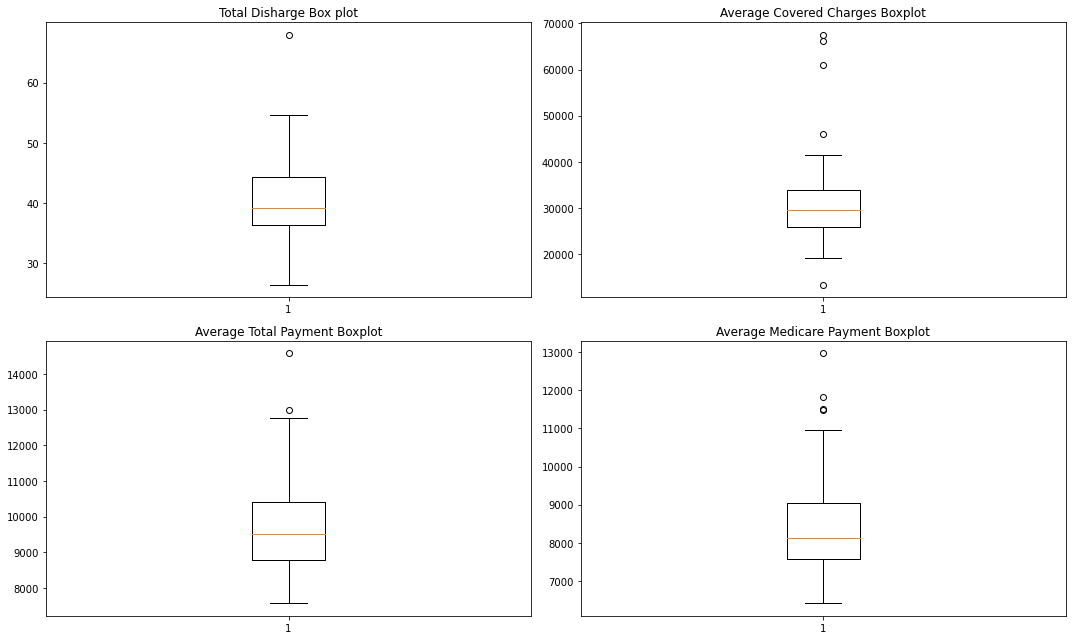

In [18]:
fig = plt.figure(figsize=(15,9))

plt.subplot(2, 2, 1)
plt.boxplot(patient_avg_bystate['Total Discharges'])
plt.title('Total Disharge Box plot')
plt.xlabel('')

plt.subplot(2, 2, 2)
plt.boxplot(patient_avg_bystate['Average Covered Charges'])
plt.title('Average Covered Charges Boxplot')
plt.xlabel('')

plt.subplot(2, 2, 3)
plt.boxplot(patient_avg_bystate['Average Total Payments'])
plt.title('Average Total Payment Boxplot')
plt.xlabel('')

plt.subplot(2, 2, 4)
plt.boxplot(patient_avg_bystate['Average Medicare Payments'])
plt.title('Average Medicare Payment Boxplot')
plt.tight_layout()
plt.show()
                                

In [19]:
#state with highest discharge
patient_avg_bystate.sort_values(by = total_discharges_name,ascending=False).head()

,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
Provider State,,,,
DE,67.901015,27071.699645,10360.072411,8959.673274
MI,54.539952,24124.247210,9754.420406,8662.157756
NJ,52.052839,66125.686274,10678.988647,9586.940056
MD,51.955255,13377.803790,12608.947664,11480.121829
NC,51.043841,25140.952162,9089.435711,7998.649702


In [20]:
patient_avg_bystate.sort_values(by = average_covered_charges_name, ascending=False).head()

,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
Provider State,,,,
CA,36.357854,67508.616536,12629.668472,11494.381678
NJ,52.052839,66125.686274,10678.988647,9586.940056
NV,35.440932,61047.115416,10291.718028,8747.602829
FL,48.127208,46016.233587,8826.990436,7667.478695
TX,40.453388,41480.193404,9243.979573,7970.430797


### 5. Number of unique procedures per hospital  

By understanding the types of procedures performed by each hospital, would allow the model developped to isolate the hospital that are at risk. 

In [21]:
unique_hospital_procedures = inpatient_charge_merged_data.groupby([provider_name, drg_defination_name]).agg({drg_defination_name: 'count'})

### 6. Top Procedures per state
By understanding the top procedures per state we esablish a baseline for what people in the state normally get treated for. This information is useful in one of two ways: 
1.  Can be used to flag non-common and expensive procedures 
2.  Focus fraud detection on the common procedures. Assuming that the fraudulent users would try to get treated for the same conditions as the population. 

If i had labled data on the fraud examples, i would have been able to further understand how to interepret it. 


In [22]:
# what are some of the common drg 
top_drg = inpatient_charge_merged_data.groupby([state_name, drg_defination_name]).agg({drg_defination_name: 'count'})
top_drg.head()

DRG Definition
State   DRG Definition                                                    
Alabama 039 - EXTRACRANIAL PROCEDURES W/O CC/MCC                        23
        057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O...              25
        064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...              35
        065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...              55
        066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...              40

### 7. Number of providers in city 

This information can be used in one of two ways: 
1. Assuming that the city with the most providers have a higher probablity of being a victim fraud. It allows you to focus on the cities with the highest concentration.
2. Assuming the cities with the lowest provider per population densitity  are a higher risk. The reason reason is that fraudsters have less options to cheat, and they are forced to choose from a select few. 

In [23]:
provider_count = inpatient_charge_merged_data.groupby([provider_city_name]).agg({provider_name:'count'})
provider_count.head()

,Provider Name
Provider City,
ABBEVILLE,18
ABERDEEN,107
ABILENE,152
ABINGDON,63
ABINGTON,99


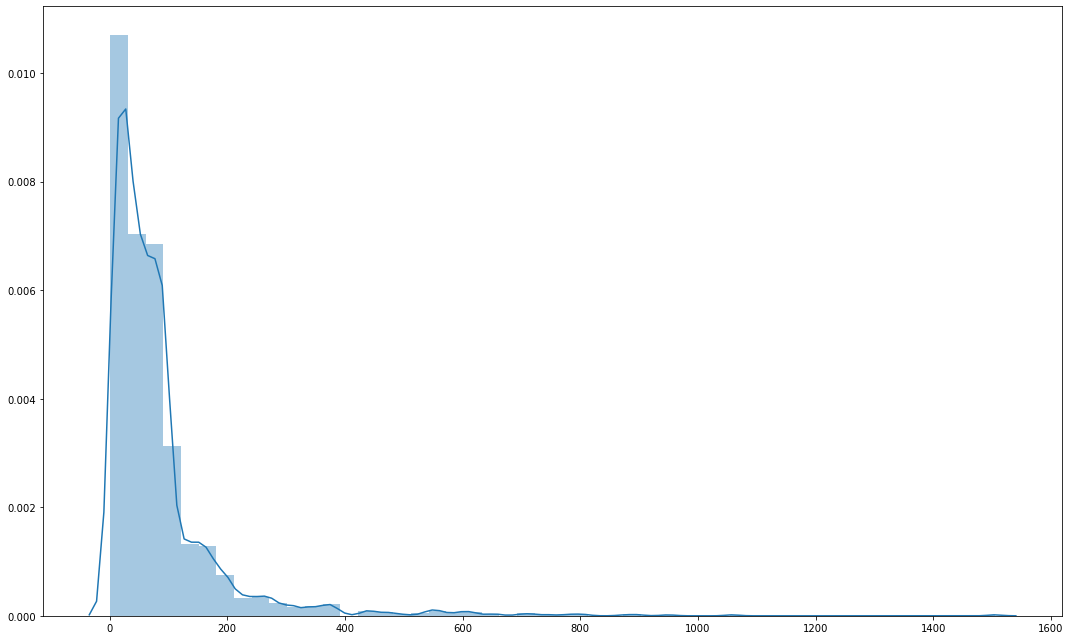

In [24]:
fig = plt.figure(figsize=(15,9))
provider_count.sort_values(by = provider_name,ascending=False).head()
sns.distplot(provider_count)
plt.tight_layout()

### 8. Medicare % Paid 

Medicare % paid varies by states, hospitals, and procedure. This feature will allow us to determing which hospitals, treatment and procedures are viewed favorably by medicare.
 

In [25]:
inpatient_charge_merged_data['Medicare % Paid']  = inpatient_charge_merged_data[average_medicare_payment] / inpatient_charge_merged_data[average_total_payment_name] 

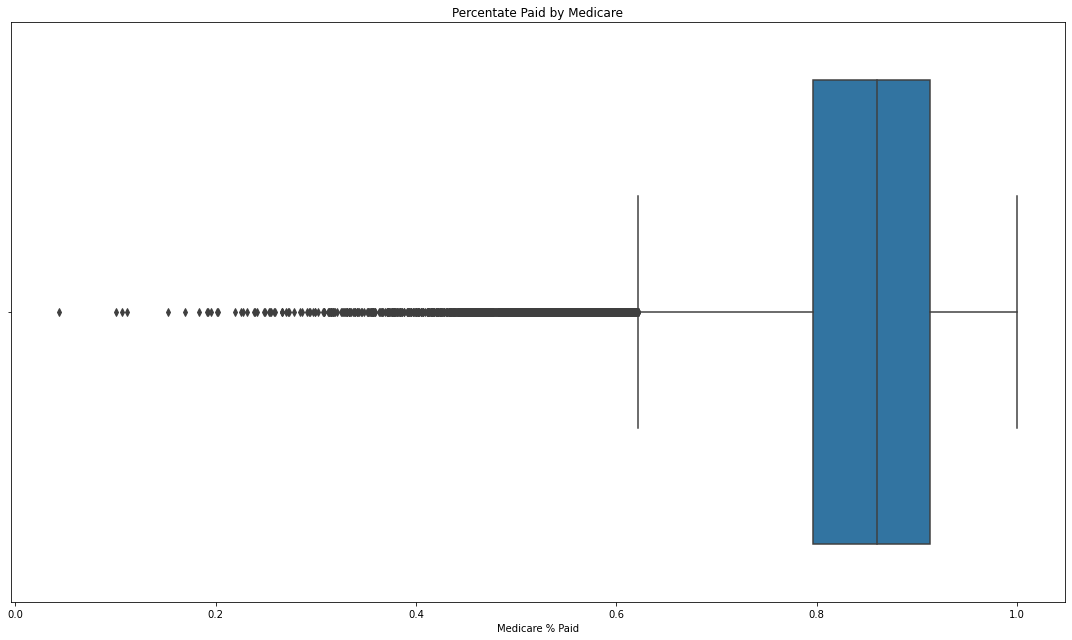

In [26]:
fig = plt.figure(figsize=(15,9))
sns.boxplot(inpatient_charge_merged_data['Medicare % Paid'])
plt.title('Percentate Paid by Medicare')
plt.tight_layout()

### 9. Mecare % paid by State

The medicare % paid highlights the hospital with the highest medical pay out. From the chart there are some states with 99% and greater medicare payout averages. Hypothesis is that those states are more attractive for fraud.

In [27]:
medicare_perct_paid_by_state = inpatient_charge_merged_data.groupby(state_name).agg({'Medicare % Paid': 'mean'})
medicare_perct_paid_by_state.head()

,Medicare % Paid
State,
Alabama,0.816622
Alaska,0.871982
Arizona,0.842718
Arkansas,0.834876
California,0.885084


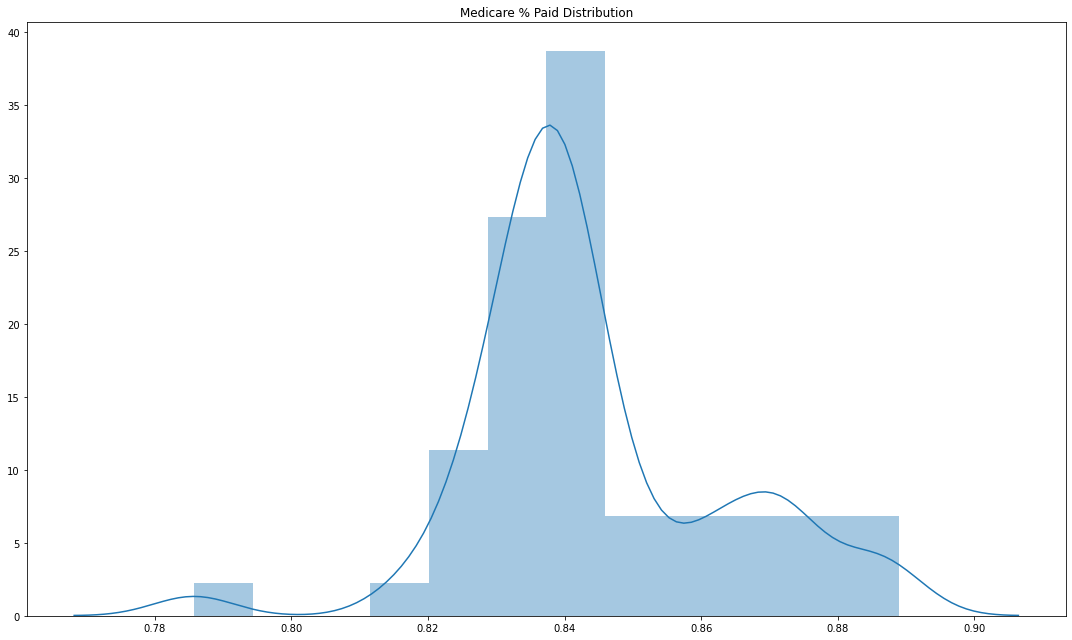

In [28]:
fig = plt.figure(figsize=(15,9))
sns.distplot(medicare_perct_paid_by_state)
plt.title('Medicare % Paid Distribution')
plt.tight_layout()

### 10. Ouf of pocket payment

Out of pocket highlight procedures that are most expensive. The hhypothesis is that the procedures with the highest out of pocket cost are the least likely to be a target for fraud.


In [29]:
inpatient_charge_merged_data['Out of Pocket Payment'] = inpatient_charge_merged_data[average_total_payment_name] - inpatient_charge_merged_data[average_medicare_payment]

In [30]:
procedure_avg_out_of_pocket = inpatient_charge_merged_data.groupby([drg_defination_name]).agg({'Out of Pocket Payment': 'mean'})
procedure_avg_out_of_pocket.sort_values(by = 'Out of Pocket Payment',ascending=False).head()

,Out of Pocket Payment
DRG Definition,
460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,3735.070150
473 - CERVICAL SPINAL FUSION W/O CC/MCC,2594.714232
247 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT W/O MCC,2582.521719
207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS,2559.372528
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,2497.221490


### 11. Average cost per procedure

Assuming that people would likely cheat on the most expensive procedures, this feature would allow us to focus on the ones that would have the highest likelyhood. 

In [31]:
inpatient_charge_merged_data['Average Cost Per Procedure']= inpatient_charge_merged_data[average_total_payment_name] / inpatient_charge_merged_data[total_discharges_name]

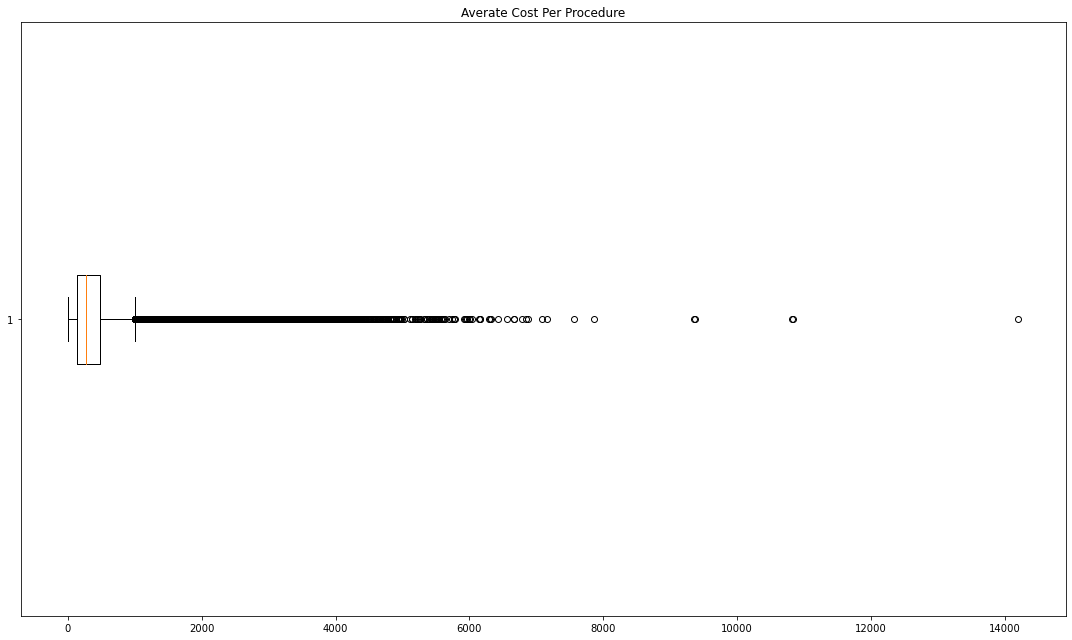

In [32]:
fig = plt.figure(figsize=(15,9))
plt.boxplot(inpatient_charge_merged_data['Average Cost Per Procedure'],vert=False)
plt.title('Averate Cost Per Procedure')
plt.xlabel("")
plt.tight_layout()
plt.show()


### 12. Coverage Ratio 

Medicare isn't obligated to pay the requested amout per hospital and procedure. Feature could provide further insight whether hospitals are attempting to commit fraud to the medicare system. 

In [33]:
inpatient_charge_merged_data['Coverage Ratio'] = inpatient_charge_merged_data[average_covered_charges_name] / inpatient_charge_merged_data[average_total_payment_name]

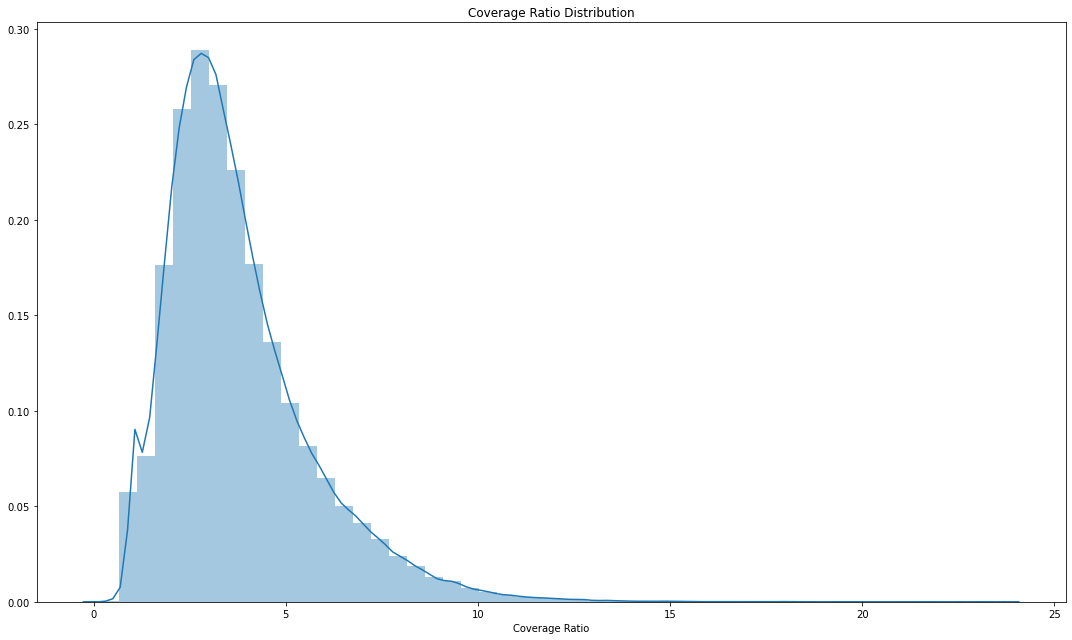

In [34]:
fig = plt.figure(figsize=(15,9))
sns.distplot(inpatient_charge_merged_data['Coverage Ratio'])
plt.title('Coverage Ratio Distribution')
plt.tight_layout()

### 13. Procedures per state

The nomimal amount of procedures per state can be a misleading number to look at, given that the states with the most people will bubble to the top. This feature can be useful when compared against the population. 

In [35]:
# total patient seen by the state
top_states = inpatient_charge_merged_data.groupby(state_code_name).agg({state_code_name:'count'})
top_states.head()

,State Code
State Code,
AK,231
AL,3635
AR,2067
AZ,2851
CA,13064


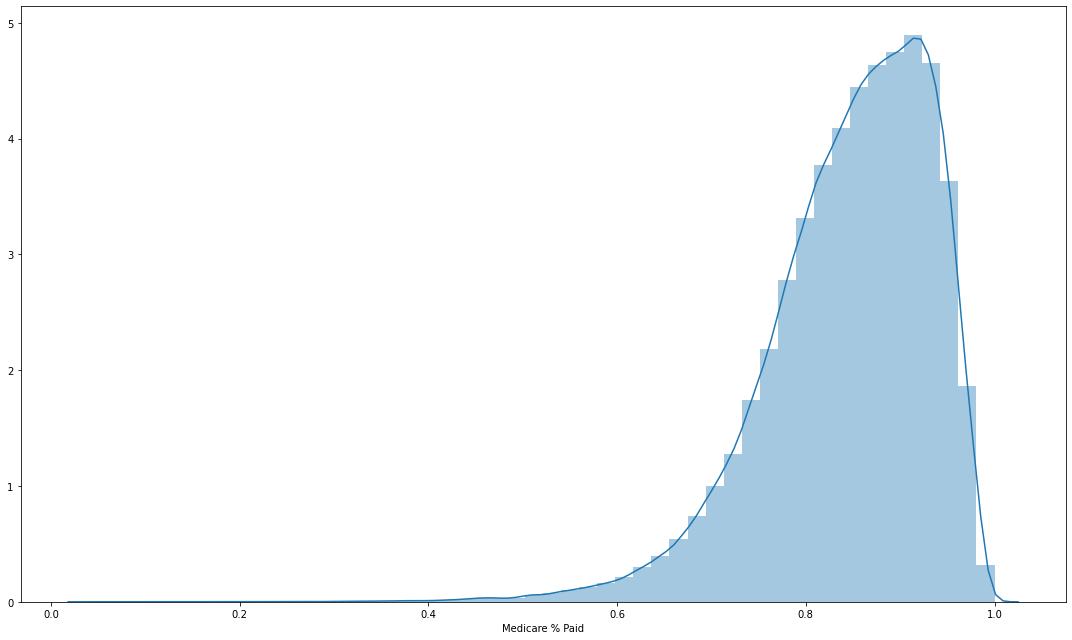

In [36]:
fig = plt.figure(figsize=(15,9))
sns.distplot(inpatient_charge_merged_data['Medicare % Paid'])
plt.tight_layout()

### 14. Out of Pocket per discharge

Out of pocket cost are not fun, and understanding the procedures, hospital that have high out of pocket cost can be useful to narrow down the ones unattractive to fraudsters.

In [37]:
inpatient_charge_merged_data['Out of Pocket per discharge'] = inpatient_charge_merged_data['Out of Pocket Payment'] / inpatient_charge_merged_data[total_discharges_name]

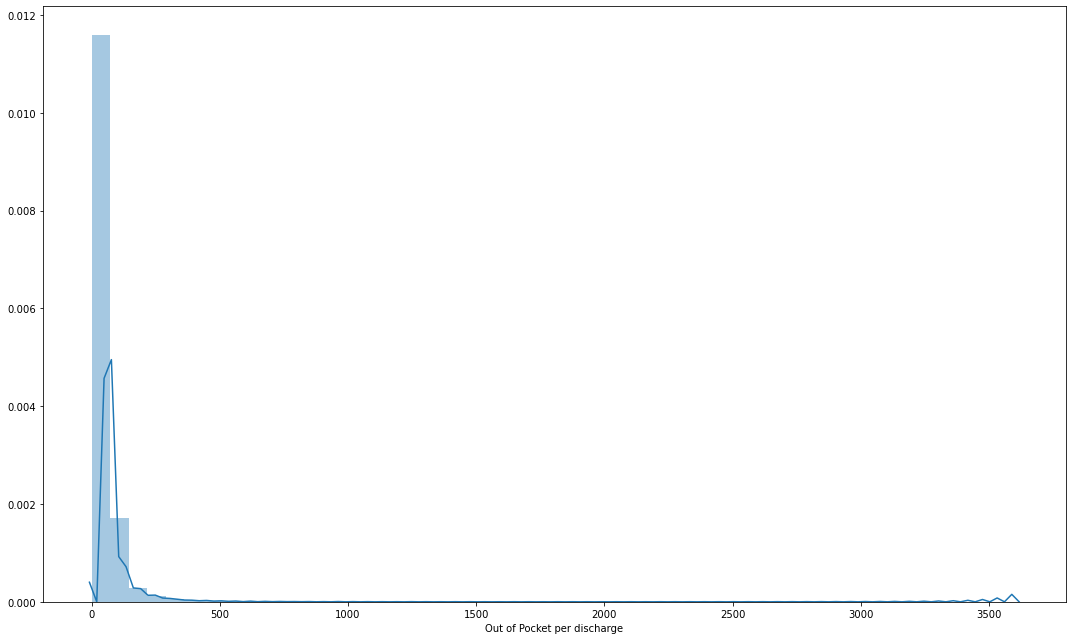

In [38]:
fig = plt.figure(figsize=(15,9))
sns.distplot(inpatient_charge_merged_data['Out of Pocket per discharge'])
plt.tight_layout()